## 19CSE305 - Machine Learning
## Phishing URL Detection using Machine Learning
#### YADHU KRISHNA M - AM.EN.U4CSE19264

Comparison of Various Machine Learning Models for the problem

Import required libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Load the dataset from phase 1

In [7]:
data = pd.read_csv("./final_dataset.csv")
#data = data.drop(['Unnamed: 0'], axis=1)

data.head()

,0.01534683855125844,0.071428571428571438,0,0.086956521739130432,0.1,0.2,0.3,0.4,0.5,0.6,...,0.19,0.20,0.21,0.22,0.23,0.24,1.1,0.027397260273972601,0.25,0.26
0,0.039902,0.090476,1,0.000000,0.000000,0.0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0.0,0.027397,0,1
1,0.069982,0.219048,1,0.130435,0.023256,0.0,0.333333,0.105263,0,0.157895,...,0,0,0,0,1,0,1.0,0.013699,0,1
2,0.003683,0.033333,0,0.043478,0.000000,0.0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0.5,0.000000,0,0
3,0.026397,0.052381,0,0.043478,0.046512,0.0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0.5,0.020548,0,0
4,0.012277,0.095238,0,0.086957,0.023256,0.0,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,1.0,0.020548,0,1


In [8]:
data.shape

(11429, 34)

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0.01534683855125844   11429 non-null  float64
 1   0.071428571428571438  11429 non-null  float64
 2   0                     11429 non-null  int64  
 3   0.086956521739130432  11429 non-null  float64
 4   0.1                   11429 non-null  float64
 5   0.2                   11429 non-null  float64
 6   0.3                   11429 non-null  float64
 7   0.4                   11429 non-null  float64
 8   0.5                   11429 non-null  int64  
 9   0.6                   11429 non-null  float64
 10  0.7                   11429 non-null  float64
 11  0.8                   11429 non-null  int64  
 12  0.9                   11429 non-null  float64
 13  0.10                  11429 non-null  int64  
 14  0.11                  11429 non-null  float64
 15  0.12               

Split the dataset into train and test

In [15]:
arr = data.values
X = arr[:,0:33]
Y = arr[:,33]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Define a function that can be used to compute KFold Accuracy for each model

In [20]:
results = {
    "KNN": 0,
    "SVM": 0,
    "Naive Bayes": 0,
    "Decision Tree": 0,
}

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Returns average accuracy of a classifier using KFold Cross-Validation

def report(y_test, y_pred, classifier):

    scores = cross_val_score(classifier, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

    avg_accuracy = sum(scores) / len(scores)
           
    return avg_accuracy

## KNN Classifier

Run KNN algorithm for various values of 'n'

In [37]:
from sklearn.neighbors import KNeighborsClassifier

scores = []

for n in range(1, 25, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=n)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = report(y_test, y_pred, knn_classifier)
    
    scores.append((n, accuracy))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It could be noted that as the value of N increases above 3, the accuracy decreases

In [49]:
scores

[(1, 0.8212444438315613),
 (3, 0.833582010654973),
 (5, 0.8262327760693662),
 (7, 0.825445374494563),
 (9, 0.8181830927001025),
 (11, 0.8153838257083015),
 (13, 0.8168716760667614),
 (15, 0.8126722776115333),
 (17, 0.8103969490678814),
 (19, 0.8054097659859067),
 (21, 0.8053219704804851),
 (23, 0.8050589670161633)]

In [22]:
max_perfomance = max(scores,key=lambda item:item[1])

best_k = max_perfomance[0]
score = max_perfomance[1]

results["KNN"] = score

print ("Best K:", best_k)
print ("KNN Accuracy Score:", score)

Best K: 3
KNN Accuracy Score: 0.833582010654973


The best value of N for KNN is 3, and the maximum attained accuracy is 0.83

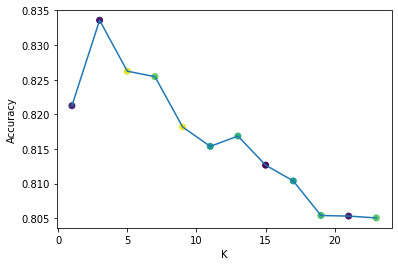

In [23]:
x = [k for k, accuracy in scores]
y = [accuracy for k, accuracy in scores]

colors = np.random.rand(len(y))

plt.scatter(x, y, c=colors, alpha=1)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(x, y)
plt.show()

## SVM

Running SVM for various Kernels

In [36]:
from sklearn import svm

kernels = ["poly", "rbf", "sigmoid", "linear"]
scores = []

for kernel in kernels:
    clf = svm.SVC(kernel=kernel) 

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = report(y_test, y_pred, clf)
    
    scores.append((kernel, accuracy))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RBF Kernel gives the highest accuracy of 0.77 in SVM

In [26]:
scores

[('poly', 0.7615748337937618),
 ('rbf', 0.7774086689251409),
 ('sigmoid', 0.6595510171561304),
 ('linear', 0.7676089744473711)]

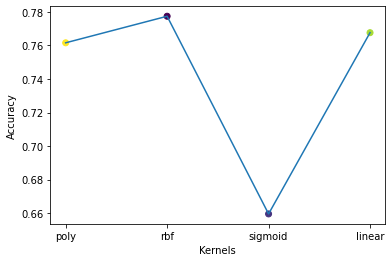

In [27]:
x = [kernel for kernel, accuracy in scores]
y = [accuracy for kernel, accuracy in scores]

colors = np.random.rand(len(y))

plt.scatter(x, y, c=colors, alpha=1)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.plot(x, y)
plt.show()

In [28]:
max_perfomance = max(scores,key=lambda item:item[1])

best_kernel = max_perfomance[0]
score = max_perfomance[1]

results["SVM"] = score

print ("Best Kernel :", best_kernel)
print ("SVM Accuracy Score :", score)

Best Kernel : rbf
SVM Accuracy Score : 0.7774086689251409


## Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = report(y_test, y_pred, gnb)

results["Naive Bayes"] = accuracy

print ("Avg. accuracy ", accuracy)

print (classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

Avg. accuracy  0.617988885364811
              precision    recall  f1-score   support

         0.0       0.57      0.97      0.72      1708
         1.0       0.90      0.26      0.41      1721

    accuracy                           0.62      3429
   macro avg       0.74      0.62      0.56      3429
weighted avg       0.74      0.62      0.56      3429



## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(X_train,y_train)

y_pred = DTC.predict(X_test)

accuracy = report(y_test, y_pred, DTC)

results["Decision Tree"] = accuracy

print ("Decision Tree accuracy score: ", accuracy)

print (classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

Decision Tree accuracy score:  0.8211562652741963
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1708
         1.0       0.82      0.78      0.80      1721

    accuracy                           0.80      3429
   macro avg       0.80      0.80      0.80      3429
weighted avg       0.80      0.80      0.80      3429



## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

accuracy = report(y_test, y_pred, logreg)

results["Logistic Regression"] = accuracy

print ("Avg. accuracy ", accuracy)

print (classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

Avg. accuracy  0.7785465630281329
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77      1708
         1.0       0.76      0.79      0.78      1721

    accuracy                           0.77      3429
   macro avg       0.77      0.77      0.77      3429
weighted avg       0.77      0.77      0.77      3429



## Summarizing Results

In [42]:
results

{'KNN': 0.833582010654973,
 'SVM': 0.7774086689251409,
 'Naive Bayes': 0.617988885364811,
 'Decision Tree': 0.8211562652741963,
 'Logistic Regression': 0.7785465630281329}

In [43]:
results.keys()
scores = [results[key] for key in results]

In [44]:
results

{'KNN': 0.833582010654973,
 'SVM': 0.7774086689251409,
 'Naive Bayes': 0.617988885364811,
 'Decision Tree': 0.8211562652741963,
 'Logistic Regression': 0.7785465630281329}

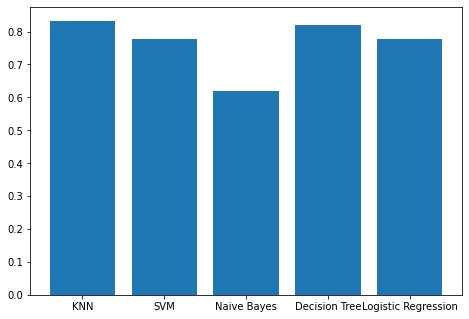

In [45]:
fig = plt.figure()
ax = fig.add_axes([1,0,1,1])

models = [model for model in results]
scores = [results[model] for model in results]
ax.bar(models,scores)
plt.show()